# YWP tidy data visualisation

## Jupyter notebook/lab

Are you already familiar to the Python or R programming language and some of the data analysis packages, nice! You did not ever used Python, R or any other programming language, very welcome! Do not be afraid to break things, but experiment as much as possible...

You're currenlty working in a Jupyter notebook. Jupyter provides a web-based interactive environment for data analysis for multiple programming languages, such as Python or R. You can combine code, equations, visualizations and narrative text.

We won't get into too much detail about Jupyter notebooks, but make sure to remember:

- A notebook is a collection of __cells__. A cell can contain __code__, text (markdown) or raw text.
- To run a cell, click __RUN__ in the menu or type __SHIFT + ENTER__ button.
- _edit_ mode means you're editing a cell, i.e. with your cursor inside a cell to type content. To start editing a code cell, click inside a cell or type __ENTER__ button.
- _command_ mode means you're NOT editing(!), i.e. NOT with your cursor inside a cell to type content. To stop editing, type __ESC__ button.


Let's try this out and __RUN__ the following cell:

In [282]:
a_python_variable = 42
a_python_variable

42

Make sure to also run the following cell, as it will provide the  essential "toolkit" for data analysis in Python:

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotnine as p9

__Remember:__ these packages each provide a set of tools on our data analysis working bench. For example, the [plotnine](https://plotnine.readthedocs.io/en/stable/) package has a lot of functionality behind the `p9.` shortcut. 

So far so good, let's work with our tidy data!

## Load (tidy) data

[Pandas](https://pandas.io/docs/) is your go to library to work with spreadsheet data in Python. As such is also provides the function to load our data from a CSV file: 

In [306]:
water_quality = pd.read_csv("../data/data_tidy.csv")
water_quality

,ID,datetime,month,location,depth_cm,dissolved_oxygen_mg_l,temperature_C,calibration
0,0,1/16/2016,january,1,0,7.57,28.6,valid
1,1,1/16/2016,january,1,50,7.41,28.6,valid
2,2,1/16/2016,january,1,100,7.27,28.3,valid
3,3,1/16/2016,january,1,150,7.20,NaN,valid
4,4,1/16/2016,january,1,200,5.88,27.9,valid
...,...,...,...,...,...,...,...,...
85,85,5/18/2020,may,3,400,3.62,27.6,valid
86,86,5/18/2020,may,3,450,2.27,27.8,valid
87,87,5/18/2020,may,3,500,0.10,27.8,valid
88,88,5/18/2020,may,3,550,0.11,27.9,valid


As we we prepared our data as a tidy data set, we can start working with it straight away!

Why not create a histogram of our temperature data to warm up? __Run__ the following cell:

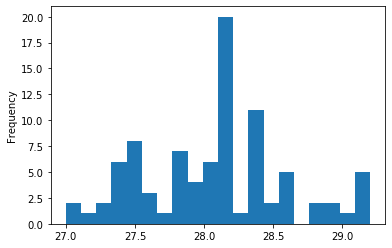

In [307]:
water_quality["temperature_C"].plot.hist(bins=20)

Working with [missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) is outside of the scope of today. For now, we will remove the `Nan` records. __Run__ the following cell:

In [308]:
water_quality = water_quality.dropna()

## The Grammar of Graphics (GoG)

The [(layered) Grammar of graphics](https://www.springer.com/gp/book/9780387245447) is a declarative approach. It describes the components of a graphic to create a wide range of statistical plots. A graph is setup by __layering different elements__ on top of each other using the + operator. 


Yes, there is a bit of a learning curve... But the GoG-power makes it certainly worhtwhile to acquire this skill!

### A. The main GoG ingredients

 __1. data__

Bind the plot to a out data table `water_quality` using the data argument:

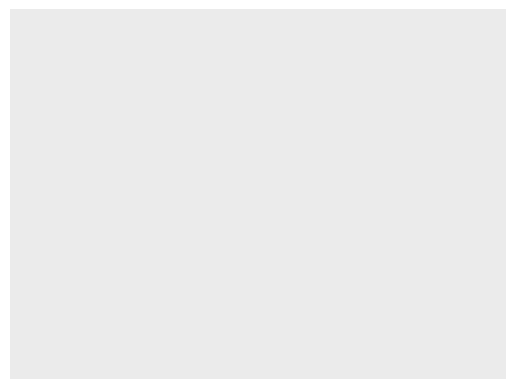

<ggplot: (8734578989401)>

In [309]:
(p9.ggplot(data=water_quality))  # This is the first part of the 'grammar' we learn today. 

We haven 't defined anything else, so just an empty figure is available.

_Note: putting everything together in brackets () provides Python-compatible syntax._

__2. aesthestics__ (the _hard_ part)

Define aesthetics (__aes__), by __selecting variables__ used in the plot and linking them to presentation such as plotting size, shape color, etc. You can interpret this as: how the variable will influence the plotted objects/geometries:

The most important `aes` are: `x`, `y`, `alpha`, `group`, `color`, `fill`, `linetype`, `shape`, `size` and `stroke`.

Let's connect our temperature observations to the `x`-axis and the DO to the `y`-axis:

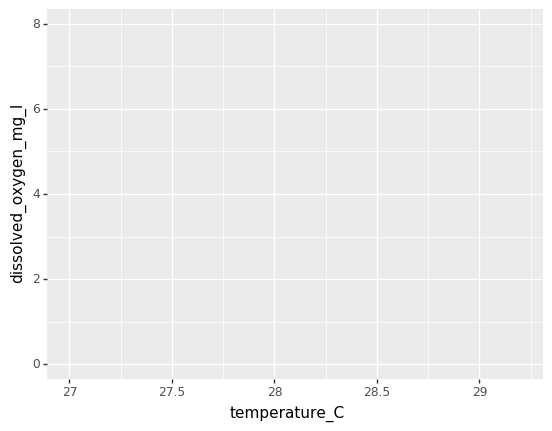

<ggplot: (8734576451473)>

In [310]:
(p9.ggplot(water_quality,
           p9.aes(x="temperature_C",               # We use the column names of our tidy data set inside "quotes"
                  y="dissolved_oxygen_mg_l"))
)

Still nothing visible on the plot, as we require a third ingredient...

__3. geometry__

The [geometry](http://plotnine.readthedocs.io/en/stable/api.html#geoms) define the visual representation of the data. Examples are `p9.geom_point`, `p9.geom_line`, `p9.geom_boxplot`, `p9.geom...`

Using our code from the previous step, add a point geometry:

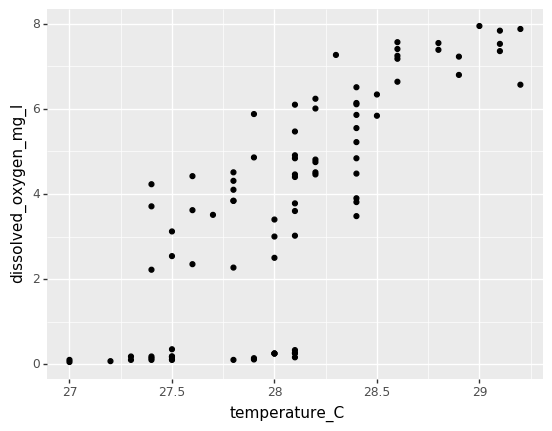

<ggplot: (8734570445537)>

In [311]:
(p9.ggplot(water_quality,
           p9.aes(x="temperature_C",               
                  y="dissolved_oxygen_mg_l"))
     + p9.geom_point()                          # combine visual layers using the + operator
)

__CONGRATULATIONS__ You just created a scatter plot using the Grammar of Graphics!

__Note:__ 

- Each of the functions of plotnine become visible by typing `p9.` + `TAB` button
- Do not forget to add brackets `()`

<div class="alert alert-success">

### Exercise 1
    
Starting from the code of the last figure, adapt the specification to create a scatter plot of the `dissolved_oxgen_mg_l` as a function of `depth_cm`.
    
</div>

In [312]:
# add your solution here

<div class="alert alert-success">

### Exercise 2
    
Starting from the code of the scatter plot of `dissolved_oxgen_mg_l` as function of `temperature`, adapt the specification in such a way to create a scatter plot where the `month` changes the `color` of the dots. You still remember the `aes`? 
</div>

In [313]:
# add your solution here

__Intermezzo on categorical data__

Let's plot the `dissolved_oxgen_mg_l` as a function of the location in the pond:

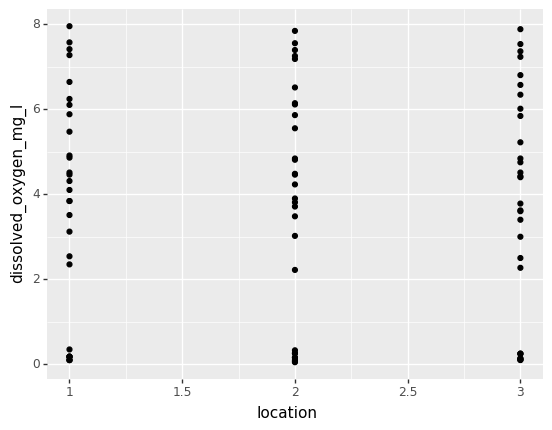

<ggplot: (8734570395885)>

In [314]:
(p9.ggplot(water_quality,
           p9.aes(x="location",               
                  y="dissolved_oxygen_mg_l"))
     + p9.geom_point()
)

The x-axis is not encoded correctly. It should be 3 categorical labels instead of the numerical values. When working with categorical data (e.g. label A, B and C) where the different categories are encoded as numbers (in our case 1, 2, 3), specify this to plotnine using `factor`:

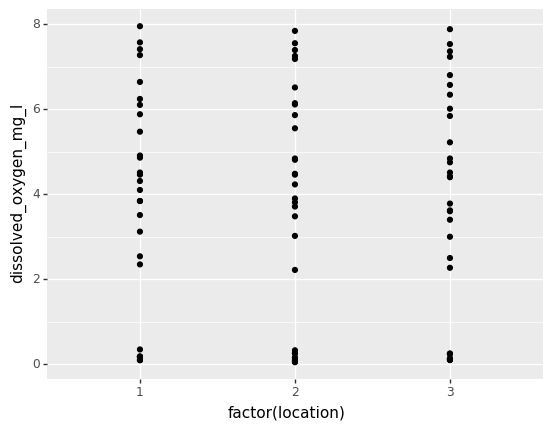

<ggplot: (8734570038445)>

In [315]:
(p9.ggplot(water_quality,
           p9.aes(x="factor(location)",               
                  y="dissolved_oxygen_mg_l"))
     + p9.geom_point()
)

Whereas the plot is technically correct, we can certainly improve this graph to study the variation of measured `dissolved_oxgen_mg_l` values in each of the `location`s of the pond...

<div class="alert alert-success">

### Exercise 3
    
Starting from the code of the scatter plot of `dissolved_oxgen_mg_l` as function of `depth_cm`, adapt the `p9.geom_*` used to get more insight into the data distribution of `dissolved_oxgen_mg_l` in each of the locations. Check [the plotnine documentation](https://plotnine.readthedocs.io/en/stable/api.html#geoms) for an overview of the available `p9.geom_*` functions.
    
__BONUS:__ What about the variation of measured `temperature_C` values in each of the locations?
    
</div>

In [316]:
# add your solution here

### B. Is it all?

No, there is much more to the GoG... 

Check the transformation from our initial scatter plot:

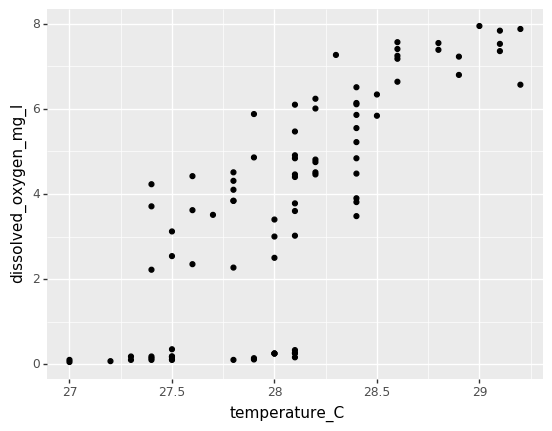

<ggplot: (8734570038369)>

In [317]:
(p9.ggplot(water_quality,
           p9.aes(x="temperature_C",               
                  y="dissolved_oxygen_mg_l"))
     + p9.geom_point()
)

To the following plot:

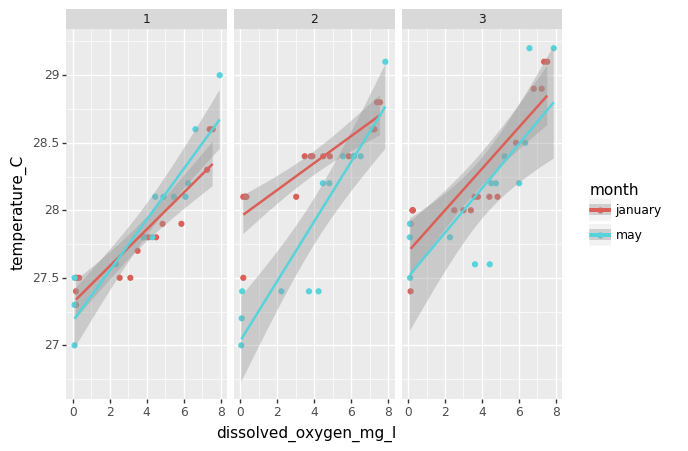

<ggplot: (8734570274253)>

In [318]:
(p9.ggplot(water_quality,
           p9.aes(x="dissolved_oxygen_mg_l",               
                  y="temperature_C",
                  color="month"))
    + p9.geom_point()
    + p9.geom_smooth(method="lm")
    + p9.facet_wrap("location")
)

By adding:

- The __color__ aes to use a separate color for each `month`.
- The __p9.geom_smooth__ to add (in this case) a linear regression. Each of the geometries is applied on the general `aes` of the graphic.
- A NEW functionality: __p9.facet_wrap(location)__ to split the plot in subplots for each location of in the pond.

<div class="alert alert-success">

### Exercise 4
    
Plot the `temperature_C` as a function of the `dissolved_oxgen_mg_l`. Use a different color for each of the `location`s and create a separate subplot for each of the `month`s of data. Add a locally weighted regression (Tip: check the [documentation](https://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_smooth.html#plotnine.stats.stat_smooth)).
    
</div>

In [319]:
# add your solution here

### C. Time for some style...

Once we have a graph setup, multiple options do exist to change the look and feel of the plot:

- Change the [labels](http://plotnine.readthedocs.io/en/stable/api.html#Labels) of the used aesthetics, such as the x-label, y-label, label of the color legend,...
- Use on of the predefined [themes](http://plotnine.readthedocs.io/en/stable/api.html#themes).
- Manipulate specific [theme elements](http://plotnine.readthedocs.io/en/stable/api.html#Themeables) to have control on specific elements of the plot.
- Define/adjust a [scale](http://plotnine.readthedocs.io/en/stable/api.html#scales) for colors, axes,.. Each of the scales can be adjusted using the `p9.scale_AES_*` setup with `AEs` for example `x`, `y`, `color`,...

In [320]:
# Tryout...

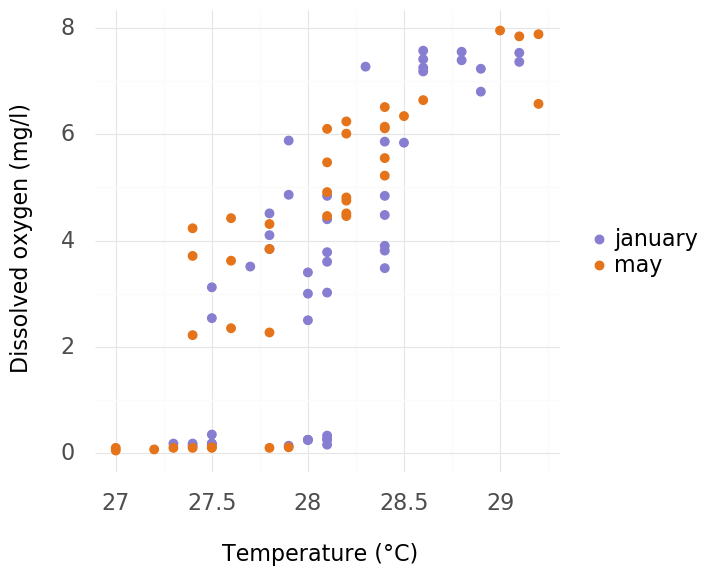

<ggplot: (8734578006433)>

In [322]:
(p9.ggplot(water_quality,
           p9.aes(x="temperature_C",               
                  y="dissolved_oxygen_mg_l",
                  color="month"))
     + p9.geom_point(size=3)
 
     + p9.labs(x="Temperature (°C)",                     # <- Labels for the used aes     
               y="Dissolved oxygen (mg/l)",
               color="")
 
     + p9.theme_minimal()                                # <- pick your favourite theme
 
     + p9.theme(figure_size=(6, 6),                      # <- adjust some specific elements
                text=p9.element_text(size=16),
                axis_title_x=p9.element_text(margin={'t': 20}),
                axis_title_y=p9.element_text(margin={'r': 20}))
 
     + p9.scale_color_manual(["#877DD1", "#E57319"])     # <- adjust a scale
)

<div class="alert alert-info">
    
__Remember:__

- Start with defining your `data`, `aes` variables and a `geometry`
- Further extend your plot with `scale_*`, `theme_*`, `labs`, `facet_*`

</div>

<div class="alert alert-success">

### Exercise 5
    
Plot a _scatter_ plot with the `depth_cm` as a function of the `dissolved_oxgen_mg_l` with a separate color for each `location`. As the y-axis represents depth, it would be more convenient to reverse the y-axis in order to have depth 0cm on top and depth 800 cm below. Check in the [position scale section](https://plotnine.readthedocs.io/en/stable/api.html#position-scales) of the documentation for the appropriate adjustment of the y-scale to do so.
    
__BONUS:__ Feel free to add your own `p9.theme()`, adjust the color scale and labels.
    
</div>

In [323]:
# add your solution here

<div class="alert alert-success">

### Exercise 6
    
Plot the `depth_cm` as a function of the `dissolved_oxgen_mg_l` with a separate subplot for each `location` and a separate `color` for each of the `month`s. Add each of the data points both as `geom_point` geometries as well as `geom_path` geometry. Reverse the y-scale in order to have zero-depth on top. Adjust the theming, labels and scales as you like.
    
</div>

In [324]:
# add your solution here

<div class="alert alert-info">
 
__TIP:__

You can reuse individual elements of a plot and recycle it in other plots to assign it to a variable. For example, to reuse the setting of a legend on top of the figure...

</div>

In [325]:
# assign my custom settings for having the legend on top of the figure
legend_adjust = p9.theme(
               text=p9.element_text(size=14),
               legend_position="top", 
               legend_direction='horizontal', 
               legend_title=p9.element_blank(),
               legend_key=p9.element_rect(fill='white', 
                                          color='white'))

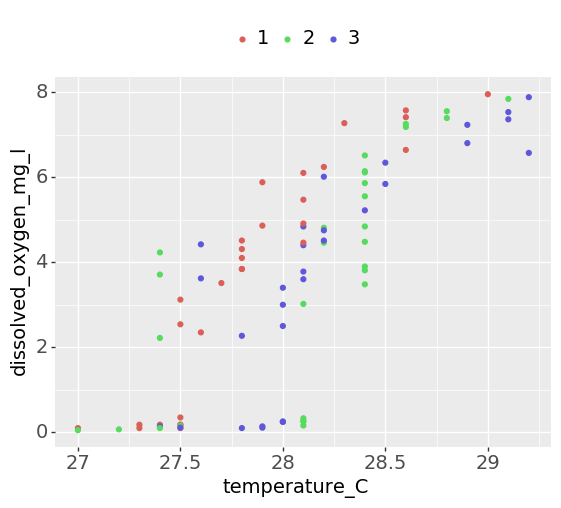

<ggplot: (8734570379909)>

In [326]:
# apply this to any other plot
(p9.ggplot(water_quality,
           p9.aes(x="temperature_C",               
                  y="dissolved_oxygen_mg_l",
                  color="factor(location)"))
     + p9.geom_point()
     + legend_adjust
)

### D. Aggregations

Up until now, we always plotted all the individual points of the data or automatic aggregations (regression, violin/boxplot) of a given combination of data. In many situations, we want to define the aggregation or summary statistic (e.g. mean, median, max,...) ourself. 

Consider the following example of the `temperature_C` as a function of the `depth_cm`:

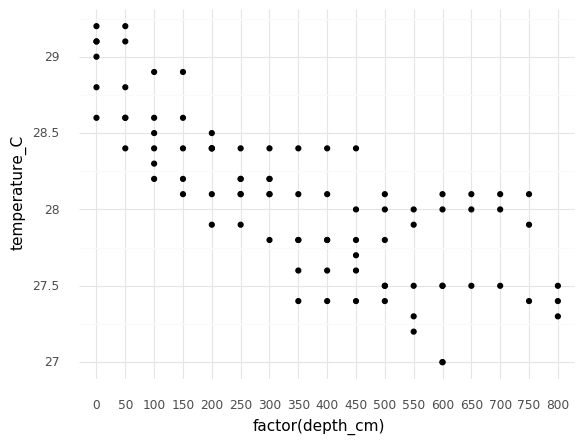

<ggplot: (8734579011225)>

In [327]:
(p9.ggplot(water_quality,
           p9.aes(x='factor(depth_cm)',
                  y="temperature_C"))
    + p9.geom_point()                           # switch to geom_line or geom_path
    + p9.theme_minimal()
)

For each depth, we have multiple observations, i.e. an observation for each `location` and each `month`. For example, for `depth_cm` 50, we have the following observations:

In [328]:
water_quality[water_quality["depth_cm"] == 50]  # this is how to filter data in Pandas using a condition

,ID,datetime,month,location,depth_cm,dissolved_oxygen_mg_l,temperature_C,calibration
1,1,1/16/2016,january,1,50,7.41,28.6,valid
18,18,1/5/2016,january,2,50,7.39,28.8,valid
35,35,1/23/2016,january,3,50,7.36,29.1,valid
52,52,5/12/2016,may,1,50,6.64,28.6,valid
65,65,5/12/2016,may,2,50,6.51,28.4,valid
78,78,5/18/2020,may,3,50,6.57,29.2,valid


In case we want to get a summary statistic added as a geometry to the plot, we can apply a `stat_summary` to the data of the y-axis and define an appropriate geometry. In this case, we take the median (using the [`numpy` package](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html), so it is `np.median`) value of all the measurements on a specific depth:

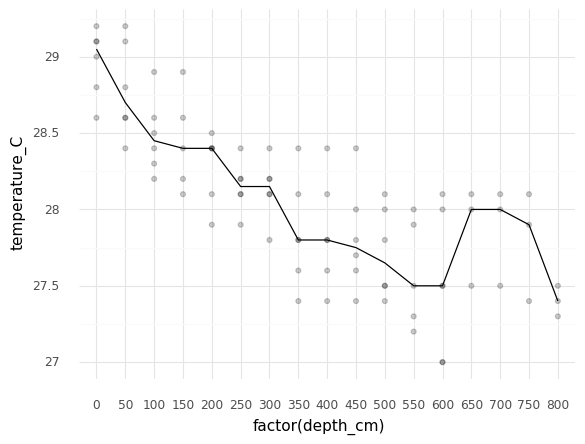

<ggplot: (8734575299909)>

In [329]:
(p9.ggplot(water_quality,
           p9.aes(x='factor(depth_cm)',
                  y="temperature_C"))
    + p9.stat_summary(fun_y=np.median, 
                      geom='line', group=1)  # group 1 required; here line instead of geom_line
    
    + p9.geom_point(alpha=0.2)   # add the points with a ot of transparency
    + p9.theme_minimal()
)

<div class="alert alert-success">

### Exercise 7
    
The following plot specifes the `dissolved_oxgen_mg_l` as a function of the `location` with a separate `color` for each of the `month`s and points used as geometry. 
    
    (p9.ggplot(water_quality,
           p9.aes(x='factor(location)',
                  y="dissolved_oxgen_mg_l",
                  fill="month"))
        + p9.geom_point()

        + p9.theme_light()
    )
    
    
Change the `geom_point` by a `stat_summary` which calculates for each of the location-month combination the average (`np.mean`) value of the `dissolved_oxgen_mg_l`. Use a `col` (or `bar`) as geometry. 
    
__TIP:__ Make sure to use the appropriate position argument. _dodge_ preserves the vertical position of an geom while adjusting the horizontal position?!? 
    
</div>

In [330]:
# add your solution here

<div class="alert alert-info">
 
__TIP:__

Aggregations can only be applied on the y-axis data. This provides an issue when we want to average over the observations of the three locations in the lake, while having the depth in the y-axis. No worries, with a small trick using the `p9.coord_flip()` function, this can be solved as well...

</div>

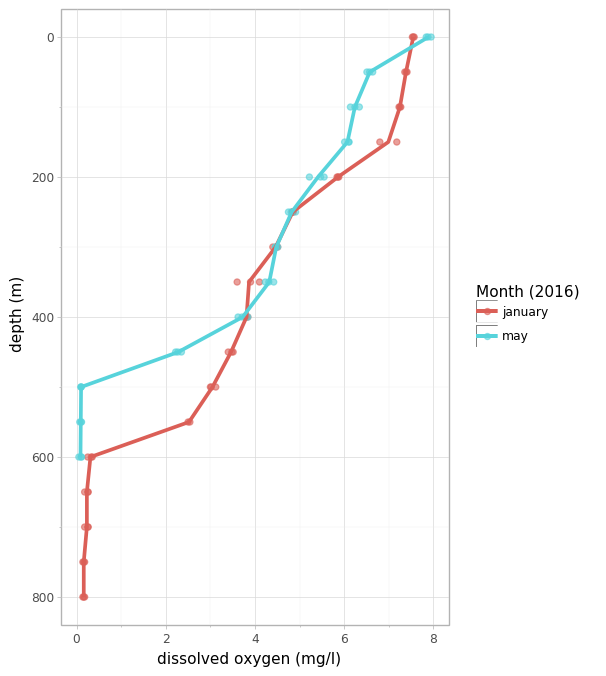

<ggplot: (8734577301069)>

In [331]:
(p9.ggplot(water_quality,
           p9.aes(x='depth_cm', 
                  y='dissolved_oxygen_mg_l', 
                  color="month"))
    + p9.geom_point(size=2, alpha=0.6)
    + p9.stat_summary(fun_y=np.mean, geom="line", size=1.5)
    + p9.coord_flip()
    + p9.scale_x_reverse()
    + p9.labs(y="dissolved oxygen (mg/l)", 
              x="depth (cm)", 
              color="Month (2016)")
    + p9.theme_light()
    + p9.theme(figure_size=(5, 8))
)

## Full data set

Load all the data from the study:

In [401]:
water_quality_all = pd.read_csv("../data/data_all_tidy.csv")

In [403]:
# small customzation to have the different months properly sorted in the visualisation
water_quality_all["month"] = pd.Categorical(water_quality_all["month"], 
                                            ["January", "March", "May", "October", 
                                             "November", "December"])

__SAME code, SAME tidy data structure, MORE data...__

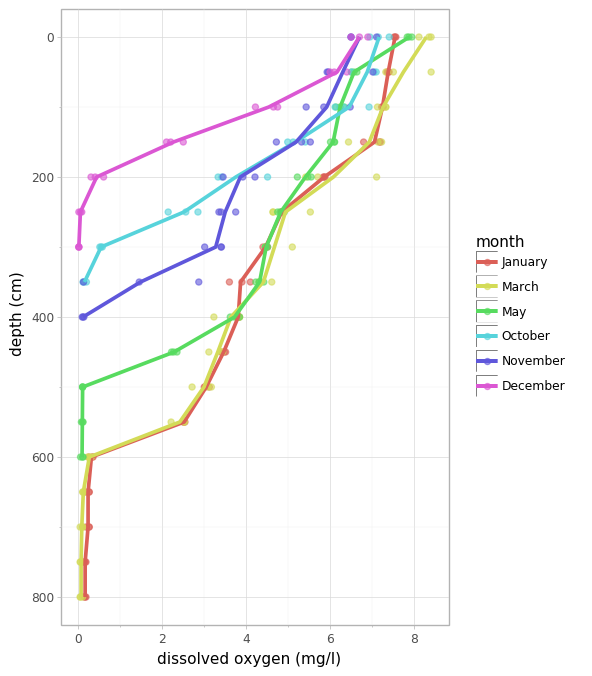

<ggplot: (8734568474037)>

In [404]:
(p9.ggplot(water_quality_all,
           p9.aes(x='depth_cm', 
                  y='dissolved_oxygen_mg_l', 
                  color="month"))
    + p9.geom_point(size=2, alpha=0.6)
    + p9.stat_summary(fun_y=np.mean, geom="line", size=1.5)
    + p9.coord_flip()
    + p9.scale_x_reverse()
    + p9.labs(y="dissolved oxygen (mg/l)", 
              x="depth (cm)")
    + p9.theme_light()
    + p9.theme(figure_size=(5, 8))
    + legend_adjust         # Reuse our code to put legend on top :-)
)

<div class="alert alert-success">

### Exercise 8
    
Try out the plot functions applied on the small data set to the full data set!
    
</div>

Towards automation...

In [394]:
variables = {"ammonia_mg_l": "Ammonia (mg/L)", 
             "nitrite_mg_l": "Nitrite (mg/L)", 
             "nitrate_mg_l": "Nitrate (mg/L)",
             "reactive_phosphate_mg_l": "Reactive phosphate (mg/L)", 
             "conductivity_microS_cm": "Conductivity (µS/cm)",
             "dissolved_oxygen_mg_l": "Dissolved oxygen (mg/L)", 
             "pH": "pH", 
             "temperature_C": "Temperature (°C)"}

Loop over each of the variables and create a pdf plot of each profile:

In [400]:
for variable, plot_axis_name in variables.items():
    
    my_plot = (p9.ggplot(water_quality_all,
           p9.aes(x='depth_cm', 
                  y=variable, 
                  color="month"))
        + p9.geom_point(size=2, alpha=0.6)
        + p9.stat_summary(fun_y=np.mean, geom="line", size=1.5)
        + p9.coord_flip()
        + p9.scale_x_reverse()
        + p9.labs(y=plot_axis_name, 
                  x="depth (cm)")
        + p9.theme_light()
        + p9.theme(figure_size=(5, 8))
        + legend_adjust         
    )
    my_plot.save(filename = f"../output/{variable}.pdf", dpi=300)

/home/stijnvh/miniconda3/envs/ywp/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 5 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/stijnvh/miniconda3/envs/ywp/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../output/nitrite_mg_l.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/home/stijnvh/miniconda3/envs/ywp/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 5 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/stijnvh/miniconda3/envs/ywp/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../output/nitrate_mg_l.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/home/stijnvh/miniconda3/envs/ywp/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 5 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/stijnvh/miniconda3/envs/ywp/lib/python3.7/site-packages/p